In [947]:
import pandas as pd
df1=pd.read_excel('UDJG_ADULT_CONS1.xls')
df2=pd.read_excel('UDJG_ADULT_CONS2.xls')
df3=pd.read_excel('UDJG_ADULT_CONS3.xls')
df4=pd.read_excel('UDJG_ADULT_CONS4.xls')
dataset2=pd.read_excel('UDJG_ADULT_FOODS.xls')
dataset3=pd.read_excel('UDJG_ADULT_SUBJ.xls')

dataset = pd.concat([df1, df2, df3, df4], axis=0, ignore_index=True)
#dataset = pd.read_excel('UDJG_ADULT_CONS1.xls')

In [948]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os
import random
from collections import Counter
import numpy as np

In [949]:
columns_to_delete=['SURVEY', 'CONDAY', 'CONMONTH', 'CONYEAR', 'EXCEPTIONDAY', 'TIMEHOUR', 
                   'TIMEMINUTES', 'UNITMEAS', 'BRAND', 'ORFACETSCODE', 'ORFACETS', 'ENFACETS', 'PACKAGE', 'OFACETS', 'ORRECIPECODE', 
                   'ENRECIPEDESC', 'AMOUNTRECIPE', 'FPREP', 'FOODEXRCODE']
dataset=dataset.drop(columns=columns_to_delete, axis=1)


columns_to_delete2=['SURVEY', 'COMMENTSFOOD', 'ENERGY', 'WATER', 'FAT', 'CARB', 'PROTEINS', 'ALCOHOL', 'ENFOODNAME', 'FOODEXCODE']
dataset2=dataset2.drop(columns=columns_to_delete2, axis=1)

columns_to_delete3=['SURVEY', 'COUNTRY', 'BIRTHDAY', 'BIRTHMONTH', 'BIRTHYEAR', 'FANTYEAR', 'SWEIGHT', 'SHEIGHT', 'SANTDAY', 'SANTMONTH', 'SANTYEAR', 'MWEIGHT', 
                    'MHEIGHT', 'ENRGYINTAKE', 'UNOVREP', 'WF', 'SPECIALCON', 'SPECDIET', 'ACTIVITY', 'ETHNIC', 'FANTMONTH', 'FANTDAY',
                    'EDUCATION', 'COMMENTSSUBJECT']
dataset3=dataset3.drop(columns=columns_to_delete3, axis=1)

In [950]:
columns_to_check_duplicates = ['ORSUBCODE', 'DAY', 'WEEK', 'SEASON', 'MEAL', 'PLACE', 'EATSEQ']
condition_not_empty = dataset['ORRECIPEDESC'].notna()

dataset_no_duplicates = dataset[condition_not_empty].drop_duplicates(subset=columns_to_check_duplicates, keep='first')
dataset_no_duplicates_foods = dataset_no_duplicates
dataset_no_duplicates = pd.concat([dataset[~condition_not_empty], dataset_no_duplicates])


In [951]:
dataset_no_duplicates_foods.to_csv('dataset_no_duplicates_foods.csv', index=False)

In [952]:
foodcode_to_recipe = dataset2.set_index('ORFOODCODE')['ORFOODNAME'].to_dict()

mask = pd.isna(dataset_no_duplicates['ORRECIPEDESC'])
dataset_no_duplicates.loc[mask, 'ORRECIPEDESC'] = dataset_no_duplicates.loc[mask, 'ORFOODCODE'].map(foodcode_to_recipe)

dataset_no_duplicates.insert(loc=11, column='GENDER', value='')
dataset_no_duplicates.insert(loc=12, column='AGE', value='')
dataset_no_duplicates.insert(loc=13, column='WEIGHT', value='')
dataset_no_duplicates.insert(loc=14, column='HEIGHT', value='')
dataset_no_duplicates.insert(loc=15, column='GEO', value='')


In [953]:
gender_to_recipe = dataset3.set_index('ORSUBCODE').to_dict()['GENDER']
age_to_recipe = dataset3.set_index('ORSUBCODE').to_dict()['AGE']
weight_to_recipe = dataset3.set_index('ORSUBCODE').to_dict()['WEIGHT']
height_to_recipe = dataset3.set_index('ORSUBCODE').to_dict()['HEIGHT']
geo_to_recipe = dataset3.set_index('ORSUBCODE').to_dict()['GEO']

dataset_no_duplicates.loc[:, 'GENDER'] = dataset_no_duplicates['ORSUBCODE'].map(gender_to_recipe)
dataset_no_duplicates.loc[:, 'AGE'] = dataset_no_duplicates['ORSUBCODE'].map(age_to_recipe)
dataset_no_duplicates.loc[:, 'WEIGHT'] = dataset_no_duplicates['ORSUBCODE'].map(weight_to_recipe)
dataset_no_duplicates.loc[:, 'HEIGHT'] = dataset_no_duplicates['ORSUBCODE'].map(height_to_recipe)
dataset_no_duplicates.loc[:, 'GEO'] = dataset_no_duplicates['ORSUBCODE'].map(geo_to_recipe)


In [954]:
dataset_no_duplicates.loc[:, 'WEEK'] = dataset_no_duplicates['WEEK'].str.replace('W', '').astype(int)
dataset_no_duplicates.loc[:, 'SEASON'] = dataset_no_duplicates['SEASON'].str.replace('S', '').astype(int)
dataset_no_duplicates.loc[:, 'MEAL'] = dataset_no_duplicates['MEAL'].str.replace('M', '').astype(int)
dataset_no_duplicates.loc[:, 'PLACE'] = dataset_no_duplicates['PLACE'].str.replace('P', '').astype(int)
dataset_no_duplicates.loc[:, 'GENDER'] = dataset_no_duplicates['GENDER'].str.replace('G', '').astype(int)
dataset_no_duplicates.loc[:, 'GEO'] = dataset_no_duplicates['GEO'].str.replace('RO', '').astype(int)

In [955]:
columns_to_delete=['ORFOODCODE', 'ORSUBCODE']
dataset_no_duplicates=dataset_no_duplicates.drop(columns=columns_to_delete, axis=1)


In [956]:
le = LabelEncoder()
#dataset['ORRECIPEDESC'] = le.fit_transform(dataset['ORRECIPEDESC'])
dataset_no_duplicates['ORRECIPEDESC_encoded'] = le.fit_transform(dataset_no_duplicates['ORRECIPEDESC'])

In [957]:
#dataset_no_duplicates=dataset_no_duplicates.sample(frac=1, random_state=42)
#dataset_no_duplicates.reset_index(drop=True, inplace=True)

In [958]:
def map_geo(value):
    if 111 <= value <= 116:
        return value // 10
    elif 121 <= value <= 126:
        return value // 10
    elif 211 <= value <= 216:
        return value // 10
    elif 221 <= value <= 226:
        return value // 10
    elif 311 <= value <= 316:
        return value // 10
    elif 321 <= value <= 326:
        return value // 10
    elif 411 <= value <= 416:
        return value // 10
    elif 421 <= value <= 426:
        return value // 10
    else:
        return value
    
dataset_no_duplicates['GEO'] = dataset_no_duplicates['GEO'].apply(map_geo)

In [959]:
def map_geo(value):
    if value == 11:
        return "Nord-Vest"
    elif value == 12:
        return "Centru"
    elif value == 21:
        return "Nord-Est"
    elif value == 22:
        return "Sud-Est"
    elif value == 31:
        return "Sud-Muntenia"
    elif value == 32:
        return "Bucuresti-Ilfov"
    elif value == 41:
        return "Sud-Vest Oltenia"
    elif value == 42:
        return "Vest"
    else:
        return value
    
dataset_no_duplicates['GEO_CHR'] = dataset_no_duplicates['GEO'].apply(map_geo)

In [960]:
dataset_no_duplicates.head()

,DAY,WEEK,SEASON,MEAL,PLACE,EATSEQ,ORRECIPEDESC,AMOUNTFRAW,AMOUNTFCOOKED,GENDER,AGE,WEIGHT,HEIGHT,GEO,ORRECIPEDESC_encoded,GEO_CHR
0,1,1,5,1,3,1,paine,25.0,25.0,2,34,64.0,164,12,1183,Centru
1,1,1,5,1,3,1,dulceata,25.0,25.0,2,34,64.0,164,12,692,Centru
2,1,1,5,1,3,2,lapte,250.0,250.0,2,34,64.0,164,12,912,Centru
24,1,1,5,3,3,2,paine,50.0,50.0,2,34,64.0,164,12,1183,Centru
27,1,1,5,7,3,1,cafea preparata,75.0,75.0,2,34,64.0,164,12,171,Centru


In [961]:
dataset_no_duplicates.head()

,DAY,WEEK,SEASON,MEAL,PLACE,EATSEQ,ORRECIPEDESC,AMOUNTFRAW,AMOUNTFCOOKED,GENDER,AGE,WEIGHT,HEIGHT,GEO,ORRECIPEDESC_encoded,GEO_CHR
0,1,1,5,1,3,1,paine,25.0,25.0,2,34,64.0,164,12,1183,Centru
1,1,1,5,1,3,1,dulceata,25.0,25.0,2,34,64.0,164,12,692,Centru
2,1,1,5,1,3,2,lapte,250.0,250.0,2,34,64.0,164,12,912,Centru
24,1,1,5,3,3,2,paine,50.0,50.0,2,34,64.0,164,12,1183,Centru
27,1,1,5,7,3,1,cafea preparata,75.0,75.0,2,34,64.0,164,12,171,Centru


In [962]:
interest = dataset_no_duplicates.iloc[:, [col for col in range(dataset_no_duplicates.shape[1]) if col not in [6, 15]]].values
scaler = StandardScaler()
interest_z = scaler.fit_transform(interest)

In [963]:
random.seed(2345)

kmeans = KMeans(init="random", n_clusters=5, n_init=10, max_iter=300,random_state=42)
#kmeans = KMeans(n_clusters=5)
kmeans.fit(interest_z)

kmeans.n_iter_
kmeans.cluster_centers_

dataset_no_duplicates['cluster'] = kmeans.labels_
Counter(dataset_no_duplicates['cluster'])

Counter({3: 25428, 4: 23835, 1: 23326, 2: 18771, 0: 1732})

In [964]:
dataset_no_duplicates['BMI'] = np.ceil((dataset_no_duplicates['WEIGHT'] / (dataset_no_duplicates['HEIGHT'] / 100) ** 2) * 10) / 10

In [965]:
def map_bmi(value):
    if value <= 18.5:
        return "Underweight"
    elif 18.5 < value <= 25:
        return "Normal"
    elif 25 < value <= 30:
        return "Overweight"
    elif 30 < value <= 35:
        return "Obese Class I"
    elif 35 < value <= 40:
        return "Obese Class II"
    elif 40 <= value:
        return "Obese Class III"
    else:
        return value
    
dataset_no_duplicates['WeightClass'] = dataset_no_duplicates['BMI'].apply(map_bmi)

In [966]:
dataset_no_duplicates.head()

,DAY,WEEK,SEASON,MEAL,PLACE,EATSEQ,ORRECIPEDESC,AMOUNTFRAW,AMOUNTFCOOKED,GENDER,AGE,WEIGHT,HEIGHT,GEO,ORRECIPEDESC_encoded,GEO_CHR,cluster,BMI,WeightClass
0,1,1,5,1,3,1,paine,25.0,25.0,2,34,64.0,164,12,1183,Centru,4,23.8,Normal
1,1,1,5,1,3,1,dulceata,25.0,25.0,2,34,64.0,164,12,692,Centru,4,23.8,Normal
2,1,1,5,1,3,2,lapte,250.0,250.0,2,34,64.0,164,12,912,Centru,4,23.8,Normal
24,1,1,5,3,3,2,paine,50.0,50.0,2,34,64.0,164,12,1183,Centru,4,23.8,Normal
27,1,1,5,7,3,1,cafea preparata,75.0,75.0,2,34,64.0,164,12,171,Centru,4,23.8,Normal


In [967]:
dataset_no_duplicates.to_csv('final.csv')

In [968]:
dataset_no_duplicates.groupby('cluster')['AGE'].mean()

cluster
0    44.281755
1     45.30331
2    48.788184
3    48.412852
4    44.979442
Name: AGE, dtype: object

In [969]:
dataset_no_duplicates.groupby('cluster')['ORRECIPEDESC'].first()

cluster
0                       ceai
1               cartof natur
2            cafea preparata
3    copane de pui preparate
4                      paine
Name: ORRECIPEDESC, dtype: object

In [970]:
dataset_no_duplicates.groupby('cluster').agg({'AGE': 'mean', 'WEIGHT': 'mean', 'HEIGHT': 'mean', 'BMI': 'mean'})

,AGE,WEIGHT,HEIGHT,BMI
cluster,,,,
0,44.281755,75.561201,171.214203,25.735624
1,45.30331,65.571427,163.824188,24.533478
2,48.788184,84.351899,175.373022,27.502024
3,48.412852,83.46041,176.068822,26.996929
4,44.979442,65.498393,163.989805,24.455549


In [971]:
dataset_no_duplicates.groupby('cluster').agg({'AGE': 'mean', 'HEIGHT': 'median'})

,AGE,HEIGHT
cluster,,
0,44.281755,170.0
1,45.30331,164.0
2,48.788184,175.0
3,48.412852,175.0
4,44.979442,164.0


In [972]:
underweight_percentage = np.mean(dataset_no_duplicates['BMI'] < 18.5) * 100
normal_weight_percentage = np.mean((dataset_no_duplicates['BMI'] >= 18.5) & (dataset_no_duplicates['BMI'] < 25)) * 100
overweight_percentage = np.mean((dataset_no_duplicates['BMI'] >= 25) & (dataset_no_duplicates['BMI'] < 30)) * 100
obese1_percentage = np.mean((dataset_no_duplicates['BMI'] >= 30) & (dataset_no_duplicates['BMI'] < 35)) * 100
obese2_percentage = np.mean((dataset_no_duplicates['BMI'] >= 35) & (dataset_no_duplicates['BMI'] < 40)) * 100
obese3_percentage = np.mean(dataset_no_duplicates['BMI'] >= 40) * 100

print(f"Percentage of people underweight: {underweight_percentage:.2f}%")
print(f"Percentage of people with normal weight: {normal_weight_percentage:.2f}%")
print(f"Percentage of people overweight: {overweight_percentage:.2f}%")
print(f"Percentage of people with class 1 obesity: {obese1_percentage:.2f}%")
print(f"Percentage of people with class 2 obesity: {obese2_percentage:.2f}%")
print(f"Percentage of people with class 3 obesity: {obese3_percentage:.2f}%")



Percentage of people underweight: 1.90%
Percentage of people with normal weight: 42.89%
Percentage of people overweight: 39.43%
Percentage of people with class 1 obesity: 12.85%
Percentage of people with class 2 obesity: 2.54%
Percentage of people with class 3 obesity: 0.39%


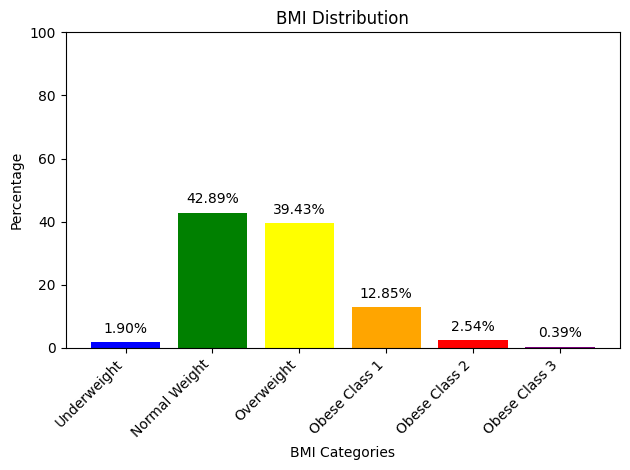

In [973]:
categories = ['Underweight', 'Normal Weight', 'Overweight', 'Obese Class 1', 'Obese Class 2', 'Obese Class 3']
percentages = [underweight_percentage, normal_weight_percentage, overweight_percentage, obese1_percentage, obese2_percentage, obese3_percentage]

plt.bar(categories, percentages, color=['blue', 'green', 'yellow', 'orange', 'red', 'purple'])
plt.xlabel('BMI Categories')
plt.ylabel('Percentage')
plt.title('BMI Distribution')
plt.ylim(0, 100)  # Set the y-axis range to 0-100 for percentages
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Annotate percentages above each bar
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 2, f'{percentage:.2f}%', ha='center', va='bottom')

plt.tight_layout()  # Adjust layout for better display
plt.show()

In [976]:
# Gruparea datelor și calcularea frecvenței fiecărei rețete în fiecare cluster și GEO
popular_recipes = dataset_no_duplicates.groupby(['cluster', 'WeightClass', 'GEO_CHR', 'BMI'])['ORRECIPEDESC'].value_counts()

# Obținerea top 5 rețete pentru fiecare combinație de cluster și GEO
top5_recipes_per_cluster_geo = popular_recipes.groupby(level=[0, 1]).nlargest(5).reset_index(level=[0, 1], drop=True)

# Afișarea rezultatelor
top5_recipes_per_cluster_geo.to_csv('statistica.csv')

In [977]:
dataset_no_duplicates.to_csv('dataset.csv')

In [978]:
features = dataset_no_duplicates[['GEO', 'AGE', 'WEIGHT', 'HEIGHT', 'AMOUNTFRAW', 'AMOUNTFCOOKED', 'ORRECIPEDESC_encoded', 'BMI']]
#k = 5  # replace with the optimal value from step 2

# Fit the k-means model
#kmeans = KMeans(n_clusters=k, random_state=42)
dataset_no_duplicates['cluster'] = kmeans.fit_predict(features)

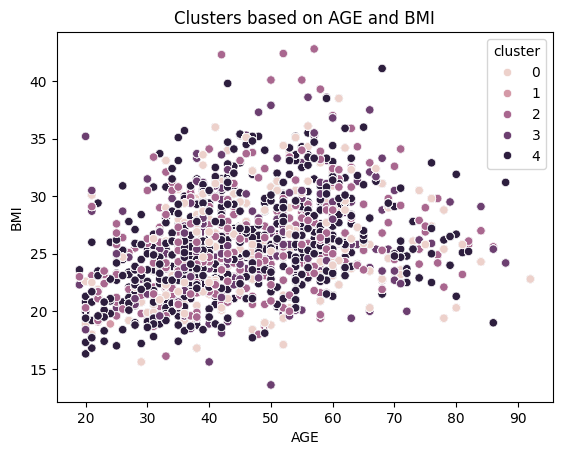

In [979]:
import seaborn as sns
# Example: Analyzing AGE and WEIGHT for each cluster
sns.scatterplot(x='AGE', y='BMI', hue='cluster', data=dataset_no_duplicates)
plt.title('Clusters based on AGE and BMI')
plt.show()

In [980]:
top_foods = (dataset_no_duplicates['ORRECIPEDESC'].value_counts(normalize=True) * 100).round(2)

# Print the top 5 foods
print("Top 15 Foods:")
print(top_foods.head(15))

Top 15 Foods:
ORRECIPEDESC
paine              14.26
cafea preparata     5.45
rosie               2.83
mar                 2.43
ceai                2.36
lapte               1.73
apa                 1.31
branza              1.11
strugure            1.09
unt                 1.08
bere                1.06
salam               1.05
iaurt               1.04
mamaliga            1.03
cartofi pai         1.03
Name: proportion, dtype: float64


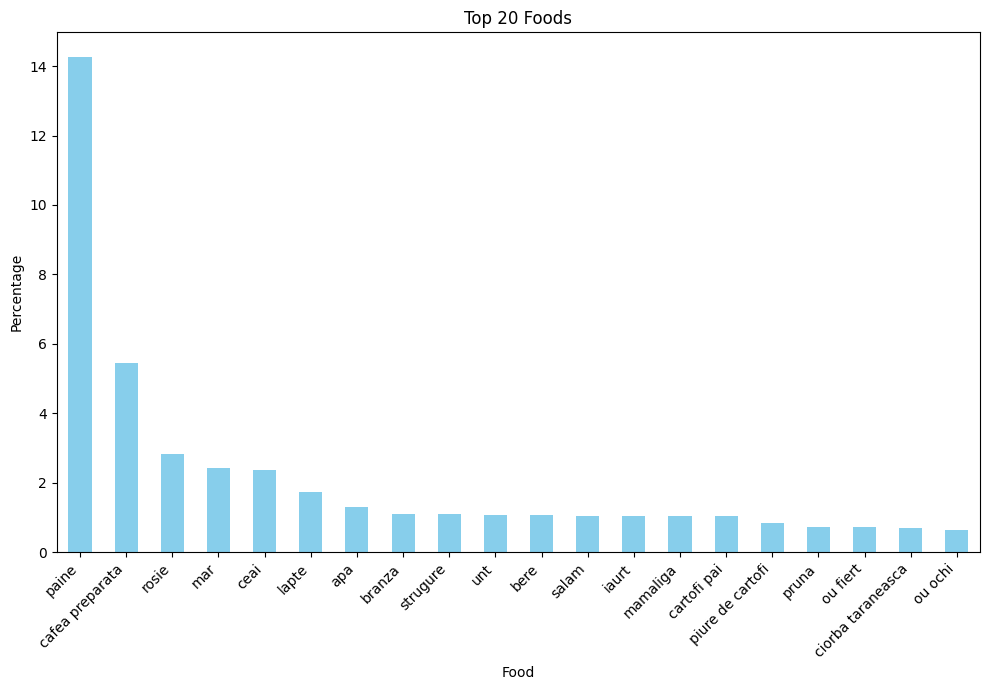

In [981]:
# Create a bar plot for the top 20 foods
plt.figure(figsize=(10, 7))
top_foods.head(20).plot(kind='bar', color='skyblue')
plt.xlabel('Food')
plt.ylabel('Percentage')
plt.title('Top 20 Foods')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

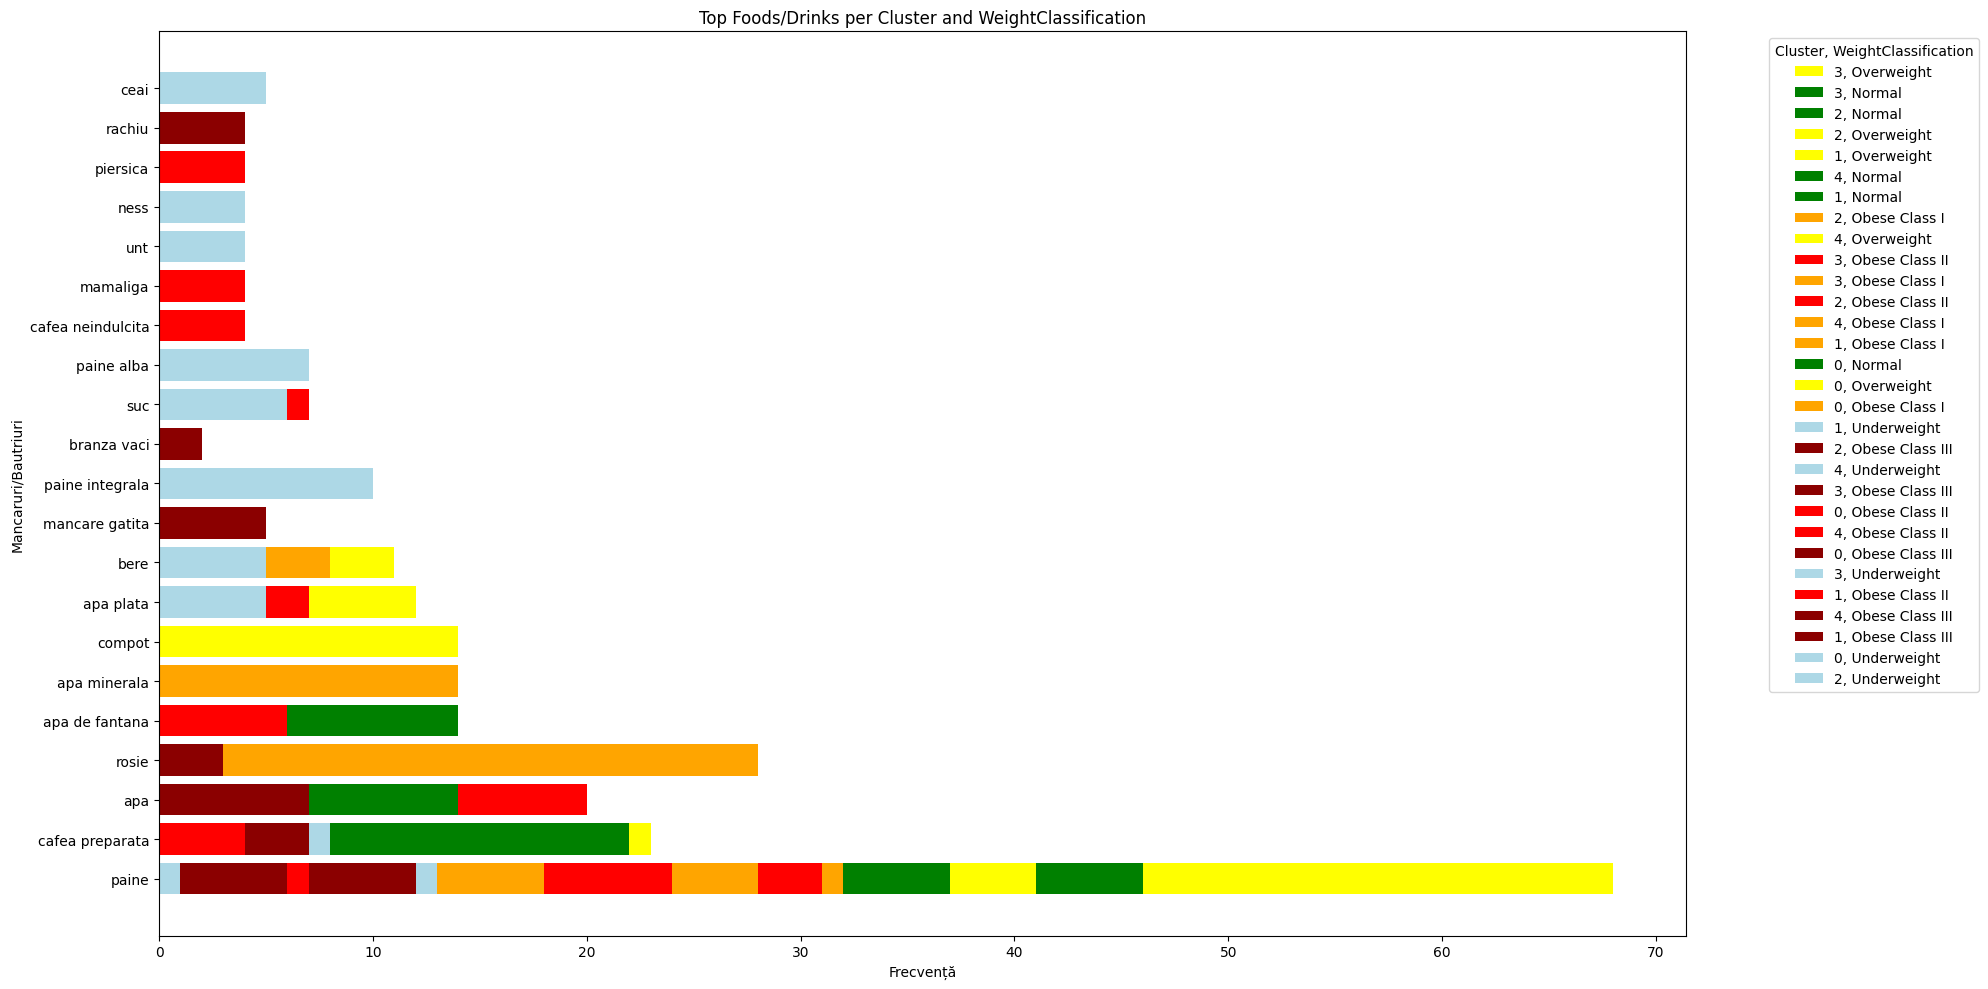

In [982]:
top5_recipes_per_cluster_geo = pd.read_csv('statistica.csv')
# Prelucrarea datelor
top5_recipes_per_cluster_geo['Label_WeightClass'] = top5_recipes_per_cluster_geo['cluster'].astype(str) + ', ' + top5_recipes_per_cluster_geo['WeightClass'].astype(str)

# Sortarea datelor în funcție de frecvență
top5_recipes_per_cluster_geo_sorted = top5_recipes_per_cluster_geo.sort_values(by='count', ascending=False)

# Definirea culorilor
colors = {
    'Underweight': 'lightblue',
    'Normal': 'green',
    'Overweight': 'yellow',
    'Obese Class I': 'orange',
    'Obese Class II': 'red',
    'Obese Class III': 'darkred'
}

# Mărirea dimensiunii graficului
plt.figure(figsize=(20, 10))

# Crearea graficului de tip bar orizontal
for label in top5_recipes_per_cluster_geo_sorted['Label_WeightClass'].unique():
    subset = top5_recipes_per_cluster_geo_sorted[top5_recipes_per_cluster_geo_sorted['Label_WeightClass'] == label]
    weight_classification = label.split(', ')[1]
    color = colors.get(weight_classification, 'grey')
    plt.barh(subset['ORRECIPEDESC'], subset['count'], color=color, label=label)

plt.ylabel('Mancaruri/Bautriuri')
plt.xlabel('Frecvență')
plt.title('Top Foods/Drinks per Cluster and WeightClassification')

# Plasarea legendei în afara graficului
plt.legend(title='Cluster, WeightClassification', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustarea layout-ului pentru a include legenda
plt.tight_layout()

plt.show()

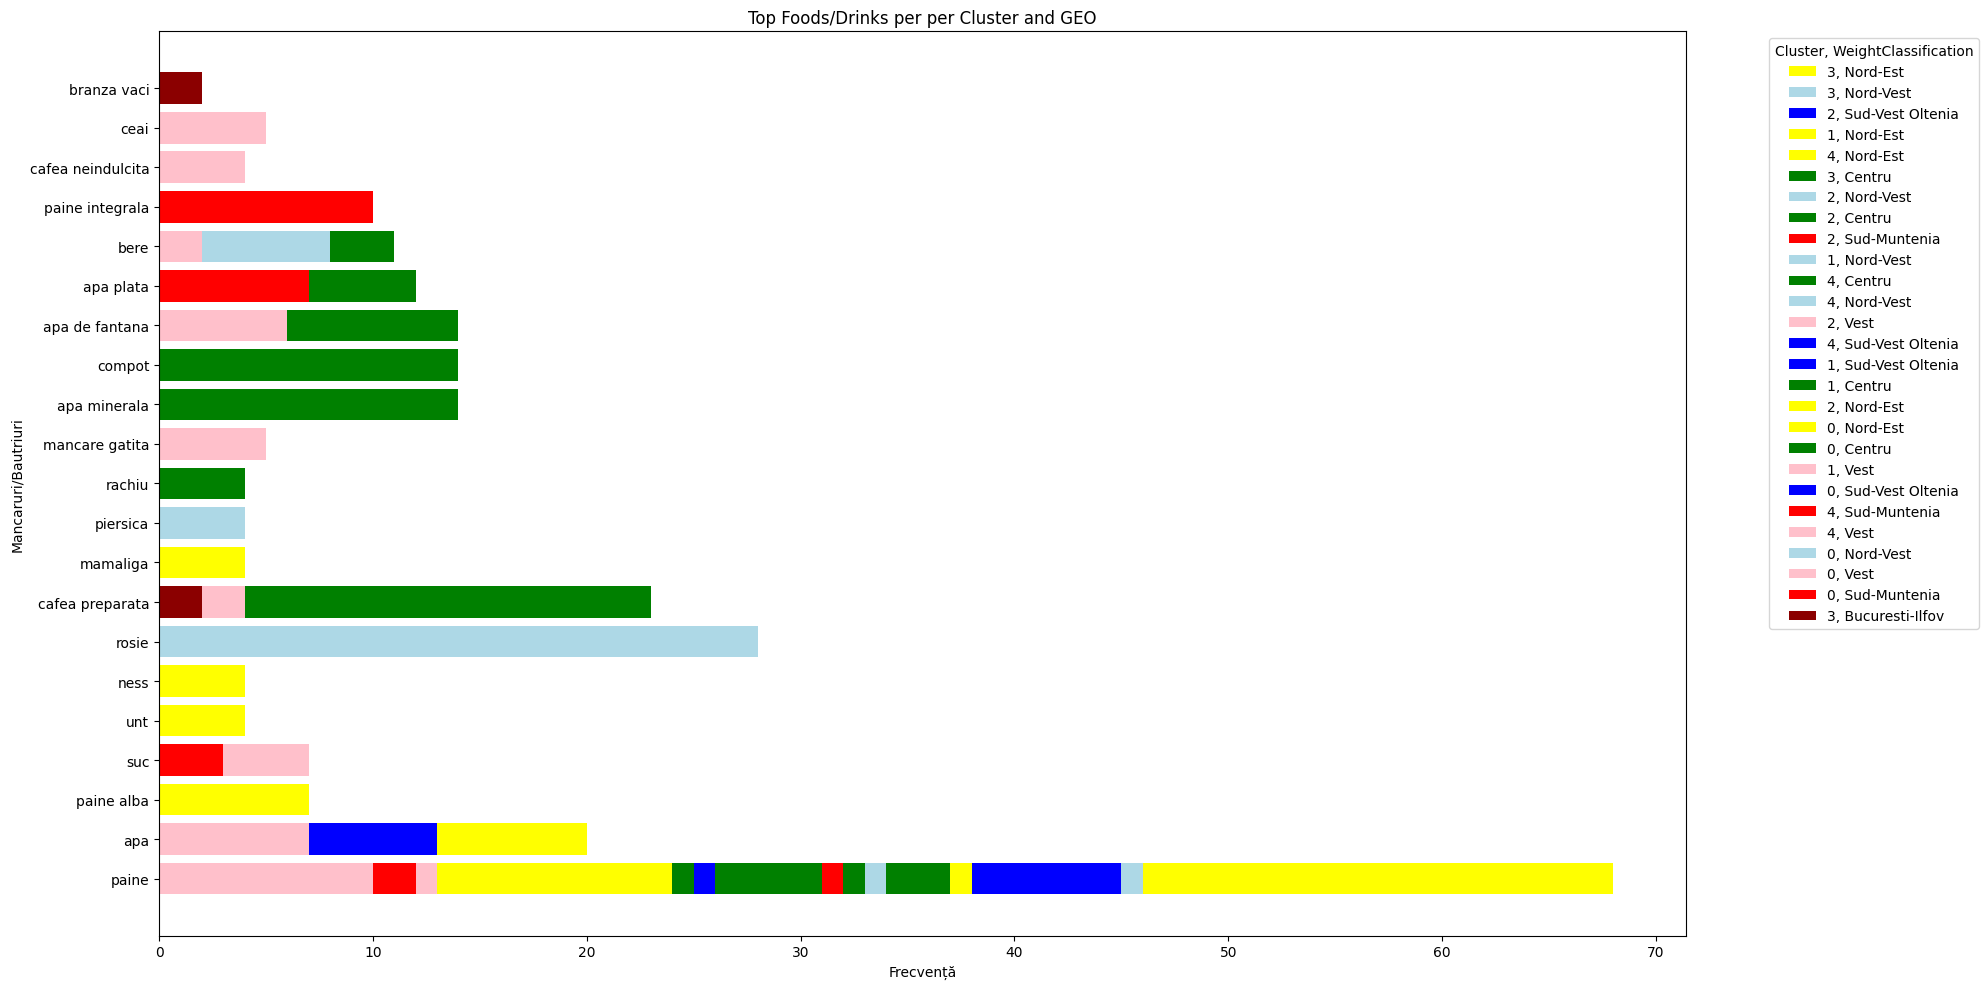

In [983]:
top5_recipes_per_cluster_geo = pd.read_csv('statistica.csv')
# Prelucrarea datelor
top5_recipes_per_cluster_geo['Label_GEO'] = top5_recipes_per_cluster_geo['cluster'].astype(str) + ', ' + top5_recipes_per_cluster_geo['GEO_CHR'].astype(str)

# Sortarea datelor în funcție de frecvență
top5_recipes_per_cluster_geo_sorted = top5_recipes_per_cluster_geo.sort_values(by='count', ascending=False)

# Definirea culorilor
colors = {
    'Nord-Vest': 'lightblue',
    'Centru': 'green',
    'Nord-Est': 'yellow',
    'Sud-Est': 'orange',
    'Sud-Muntenia': 'red',
    'Bucuresti-Ilfov': 'darkred',
    'Sud-Vest Oltenia': 'blue',
    'Vest': 'pink'
}

# Mărirea dimensiunii graficului
plt.figure(figsize=(20, 10))

# Crearea graficului de tip bar orizontal
for label in top5_recipes_per_cluster_geo_sorted['Label_GEO'].unique():
    subset = top5_recipes_per_cluster_geo_sorted[top5_recipes_per_cluster_geo_sorted['Label_GEO'] == label]
    weight_classification = label.split(', ')[1]
    color = colors.get(weight_classification, 'grey')
    plt.barh(subset['ORRECIPEDESC'], subset['count'], color=color, label=label)

plt.ylabel('Mancaruri/Bautriuri')
plt.xlabel('Frecvență')
plt.title('Top Foods/Drinks per per Cluster and GEO')

# Plasarea legendei în afara graficului
plt.legend(title='Cluster, WeightClassification', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustarea layout-ului pentru a include legenda
plt.tight_layout()

plt.show()

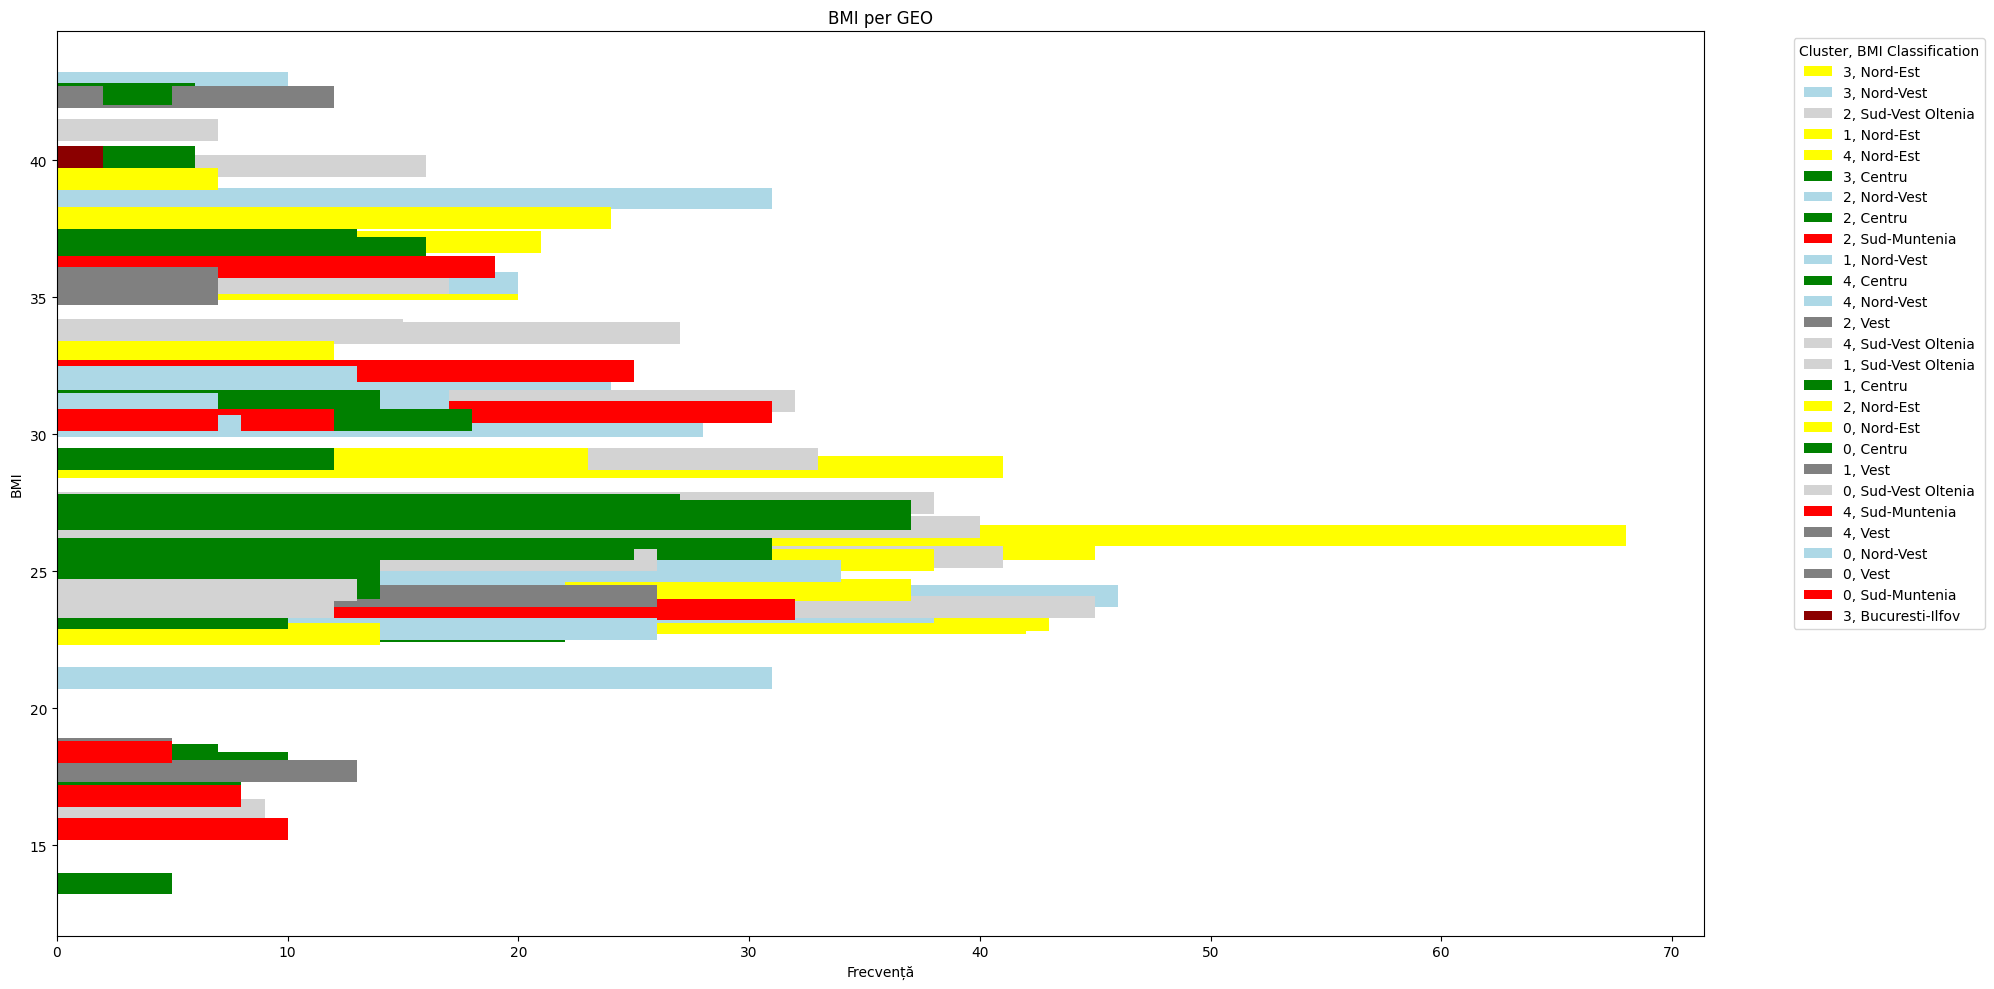

In [984]:
# Definirea culorilor pentru BMI
colors = {
    'Nord-Vest': 'lightblue',
    'Centru': 'green',
    'Nord-Est': 'yellow',
    'Sud-Est': 'orange',
    'Sud-Muntenia': 'red',
    'Bucuresti-Ilfov': 'darkred',
    'Sud-Vest Oltenia': 'lightgrey',
    'Vest': 'grey'
}
# Mărirea dimensiunii graficului
plt.figure(figsize=(20, 10))

# Crearea graficului de tip bar orizontal pentru BMI
for label in top5_recipes_per_cluster_geo_sorted['Label_GEO'].unique():
    subset = top5_recipes_per_cluster_geo_sorted[top5_recipes_per_cluster_geo_sorted['Label_GEO'] == label]
    bmi_class = label.split(', ')[1]
    color = colors.get(bmi_class, 'grey')
    plt.barh(subset['BMI'], subset['count'], color=color, label=label)

plt.ylabel('BMI')
plt.xlabel('Frecvență')
plt.title('BMI per GEO')

# Plasarea legendei în afara graficului
plt.legend(title='Cluster, BMI Classification', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustarea layout-ului pentru a include legenda
plt.tight_layout()

# Afisarea graficului pentru BMI
plt.show()


<Figure size 1600x800 with 0 Axes>

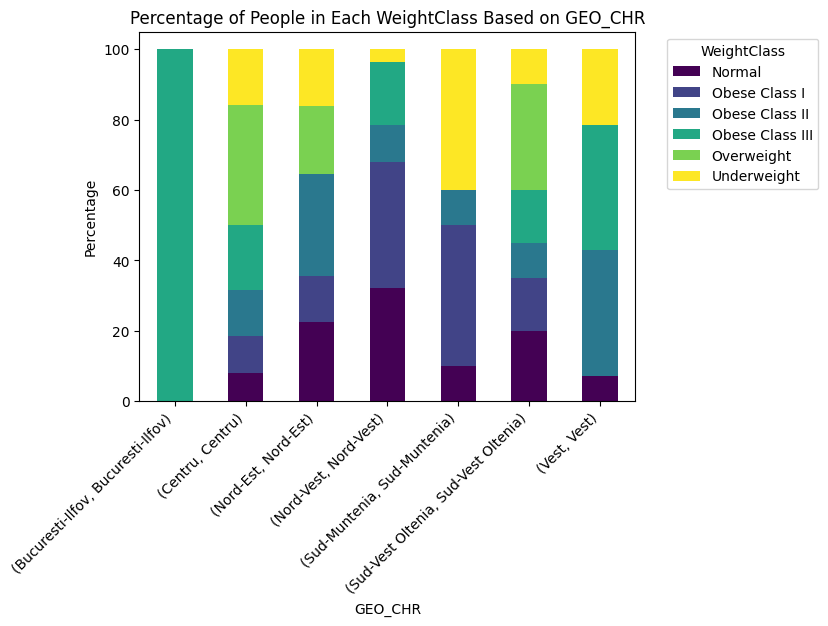

In [988]:
df = pd.read_csv('statistica.csv')

percentage_by_geo_weightclass = (
    df.groupby(['GEO_CHR', 'WeightClass'])['WeightClass']
    .count()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())
    .unstack()
)

# Create a grouped bar chart
plt.figure(figsize=(16, 8))
percentage_by_geo_weightclass.plot(kind='bar', stacked=True, colormap='viridis')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('GEO_CHR')
plt.ylabel('Percentage')
plt.title('Percentage of People in Each WeightClass Based on GEO_CHR')
plt.legend(title='WeightClass', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()